### library 설치

- pip install scikit-learn==1.2.1
- pip install pydotplus==2.0.2
- conda install graphviz

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 사이킷런으로 퍼셉트론 훈련하기

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [7]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolor='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_7189/1919333796.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


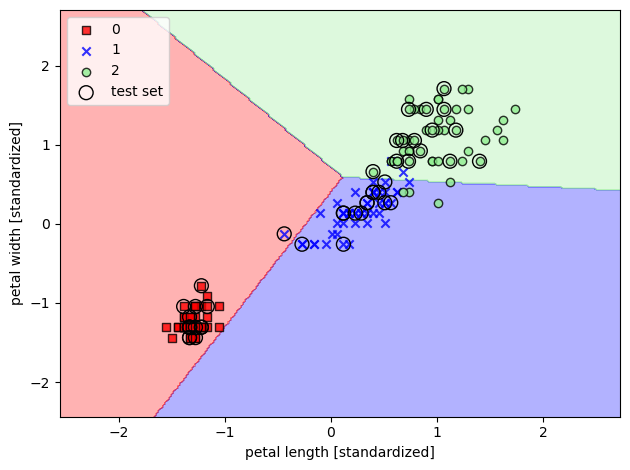

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=ppn, 
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 결정 트리 학습

/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_7189/1919333796.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


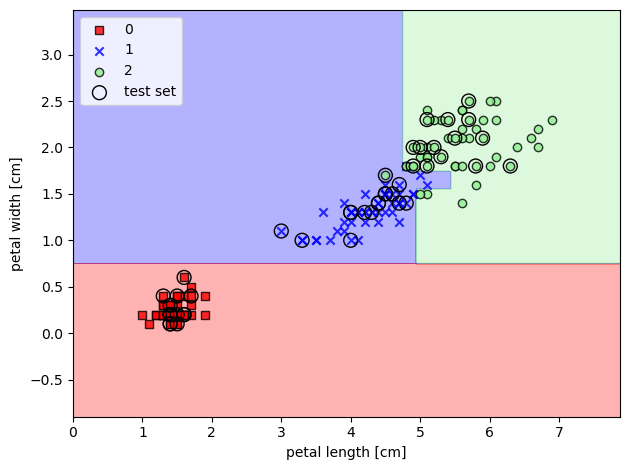

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                                    random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=tree,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 결정 트리 시각화

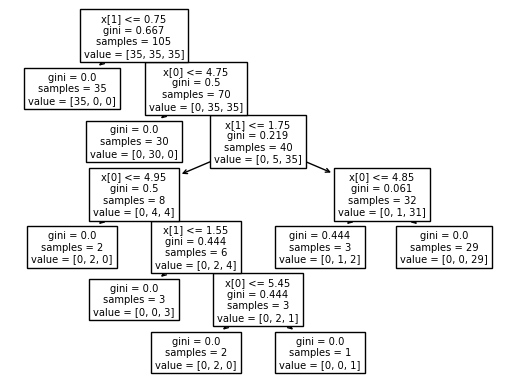

In [11]:
from sklearn import tree as t

t.plot_tree(tree)
plt.show()

In [12]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

### 결정 트리 평가

In [13]:
from sklearn.metrics import accuracy_score

y_tree_pred = tree.predict(X_test)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_tree_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_tree_pred))

잘못 분류된 샘플 개수: 1
정확도: 0.978


### 하이퍼파라미터 영향 점검

In [14]:
# 결정 트리 학습
def train(X_train, y_train, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    tree_model = DecisionTreeClassifier(criterion='gini', 
                                        max_depth=max_depth,
                                        min_samples_split=min_samples_split,
                                        min_samples_leaf=min_samples_leaf,
                                        random_state=1)
    
    tree_model.fit(X_train, y_train)
    
    # 성능 측정
    y_pred = tree_model.predict(X_test)
    print('정확도: %.3f' % accuracy_score(y_test, y_pred))

    return tree_model

# 결정 트리 시각화
def tree_visualization(tree_model):    
    tree.plot_tree(tree_model)
    plt.show()
    
# 결정 경계 시각화
def decision_visualization(X_train, X_test, y_train, y_test, tree_model):    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X_combined, 
                          y_combined, 
                          classifier=tree_model,
                          test_idx=range(105, 150))

    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

정확도: 0.978


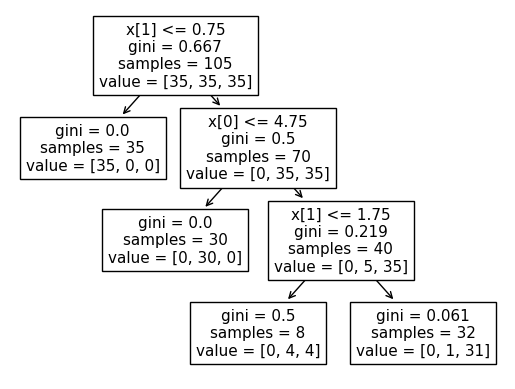

/var/folders/y1/08kzpz3x6_n3fkyg8spwflyc0000gn/T/ipykernel_7189/1919333796.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


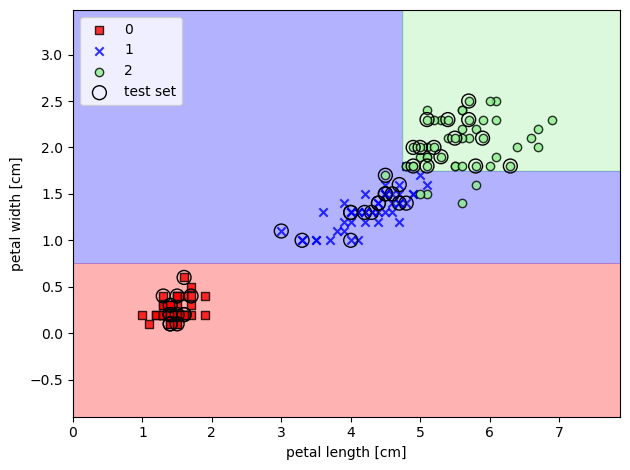

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# 하이퍼 파라미터 변경
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1

# 결정 트리 학습 및 성능 측정
tree_model = train(X_train, y_train, max_depth=max_depth, 
                   min_samples_split=min_samples_split, 
                   min_samples_leaf=min_samples_leaf)

# 트리 모양 시각화
tree_visualization(tree_model)

# 결정 경계 시각화
decision_visualization(X_train, X_test, y_train, y_test, tree_model)